Most of the contents of this notebook were prepared by Dr. Edward Raff (Spring 2019)

## LINEAR REGRESSION

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import seaborn as sns
from matplotlib import pyplot 

In linear regression, the goal is to learn a set of weights $\theta$ to predict a value $y$, based on a datapoint $x$. If $x$ has $n$ features, this looks like:

$$ {h_\theta}(x) = \theta_1 \cdot x_1 + \theta_2 \cdot x_2 + \ldots + \theta_{n-1} \cdot x_{n-1} + \theta_n \cdot x_n$$

Written with more math-like notation, that becomes

$${h_\theta}(x) = \sum_{i=1}^m \theta_i \cdot x_i = \theta^T x$$


To learn these weights $\theta$ we use our training data. We have $m$ datapoints, $x^{(1)}, x^{(2)}, \ldots, x^{(m)}$ and associated labels $y^{(1)}, y^{(2)}, \ldots, y^{(m)}$. 

We will use what is called a ***cost function*** or an ***objective function***. It is a function that describes a score we want to minimize in order to achieve our goal. For linear regression, our cost function is parameterized with $\theta$.

$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Optimization is done using a gradient, so we a need a gradient:

$$\nabla_\theta J = \frac{1}{m} \sum_{i=1}^m x^{(i)} \cdot \underbrace{( \theta^T x^{(i)}-y^{(i)})}_{\text{The error}}$$

Lets look at some naive code for this. 

Assume there is only one variable ($\theta_1$), there is not even bias(intercept) term ($\theta_0$).

Notation: w is used instead of $\theta_1$, @ stands for dot product, X denotes data points ($x^{(1)}, x^{(2)}, \ldots, x^{(m)}$), and y denotes  targets ($y^{(1)}, y^{(2)}, \ldots, y^{(m)}$).

In [7]:
def _gradient_step(w, error, rate = 0.3):  #error=gradient, rate=learning rate=alpha
    update = error * rate
    return w - update
  
def linear_regression(X,y):
  def objective_func(w):    #objective function = cost function
    return np.sum((X @ w - y) * (X @ w - y))/(2*len(y))
  def gradient(w):
    return np.sum([X[i] * (X[i]*w - y[i]) for i in range(y.shape[0])])/len(y)

  #Lets pick some starting value for our weight vector. 
  w = np.zeros(X.shape[1])
  
  for i in range(30):
    w = _gradient_step(w, gradient(w))
    print(w,objective_func(w))
  return w  
  

We will use make_regression() function to make a toy regression problem. [See documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html )

<class 'tuple'>


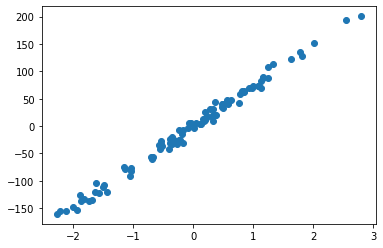

In [8]:
# Line below generates a random regression problem (no_of_samples, no_of_features ..)
data = datasets.make_regression(100,1,noise = 7)
print(type(data))
#display(data)
pyplot.scatter(data[0][:], data[1][:], marker="o")
#a=data[0]
#b=data[1]
#print(type(a), type(b))
#print(a.shape, b.shape)
#help(pyplot.plot)

In [9]:
w = linear_regression(data[0], data[1])
# remember, what it prints are w and current value of objective_func

[25.1909828] 1375.7385680220125
[41.79472005] 613.419534967065
[52.73848087] 282.2440014535351
[59.95167023] 138.37086010161812
[64.70598657] 75.86781048662276
[67.8396245] 48.71450602363861
[69.9050501] 36.91825051608928
[71.26640167] 31.793583491157488
[72.16368797] 29.56726581775545
[72.75510221] 28.600082904448385
[73.1449118] 28.179908012532028
[73.40184088] 27.997370730940432
[73.57118651] 27.918070754164372
[73.68280464] 27.8836203325198
[73.75637375] 27.86865397818102
[73.8048642] 27.86215211981465
[73.83682495] 27.85932750660163
[73.85789074] 27.85810040515561
[73.8717755] 27.857567313420454
[73.88092715] 27.85733572148567
[73.88695913] 27.857235110613793
[73.89093489] 27.857191402064313
[73.89355537] 27.857172413686015
[73.89528257] 27.85716416453304
[73.89642099] 27.857160580839704
[73.89717134] 27.85715902396981
[73.89766591] 27.857158347616224
[73.89799188] 27.857158053786794
[73.89820674] 27.857157926137987
[73.89834835] 27.857157870683306


## Solving linear regression with Scikit-learn.
The toy implementation above is just for demonstration, and doesn't have all the features we would want when doing some real machine learning. 
Below we will use Scikit-learn's implementation.

First lets put the data into a *dataframe*. We do not have to, but sometimes it makes things easier.

In [10]:
df=pd.DataFrame(data=np.c_[data[0],data[1]], columns=['X','Y'])
#np.c_[a,b] is the same with np.column_stack((a,b))
#similarly there is also np.r_[a,b] for row stack
display(df)

,X,Y
0,-1.032582,-81.331127
1,-1.614012,-103.156305
2,1.133954,68.802142
3,-1.869388,-136.868235
4,0.369815,20.776811
...,...,...
95,0.126179,4.203539
96,1.156838,86.936915
97,0.165409,13.704587
98,-0.070836,5.182891


In [11]:
df.head()

,X,Y
0,-1.032582,-81.331127
1,-1.614012,-103.156305
2,1.133954,68.802142
3,-1.869388,-136.868235
4,0.369815,20.776811


In [12]:
X = df['X'].values.reshape(-1, 1) 
#X = df['X'].values
Y = df['Y'].values.reshape(-1, 1)
print(X.shape)
print(Y.shape)
#help(df.values.reshape)

(100, 1)
(100, 1)


Now we are ready to call the built-in function for linear regression.

In [13]:
lr = LinearRegression()
lr.fit(X,Y)
#help(lr)

#A note on normalization
#In LinearRegression() default value for 'normalize' parameter is True.
#I.e. X will be normalized before regression by subtracting the mean and dividing by the l2-norm

LinearRegression()

In [14]:
lr.coef_, lr.intercept_    #intercept=theta_zero   coef=slope

(array([[73.89162369]]), array([-0.22473358]))

This new version has so-called ***intercept*** ($\theta_0$ in lecture notes).

$$h_{\theta}(x) = \theta_0 + \theta_1 x_1$$

So this solution corresponds to the line  y = lr.intercept_ + x*lr.coef_

<function <lambda> at 0x7f2a1fb9b4d0>
[-3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75]
[array([-221.89960464]), array([-203.42669872]), array([-184.9537928]), array([-166.48088687]), array([-148.00798095]), array([-129.53507503]), array([-111.06216911]), array([-92.58926319]), array([-74.11635726]), array([-55.64345134]), array([-37.17054542]), array([-18.6976395]), array([-0.22473358]), array([18.24817235]), array([36.72107827]), array([55.19398419]), array([73.66689011]), array([92.13979603]), array([110.61270196]), array([129.08560788]), array([147.5585138]), array([166.03141972]), array([184.50432564]), array([202.97723157])]


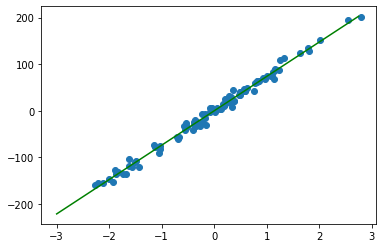

In [15]:
f = lambda x: lr.coef_[0] * x + lr.intercept_
print(f)
steps = list(np.arange(-3,3,.25))   # x-coordinate
print(steps)
fitline = list(map(f, steps))       # y-coordinate
print(fitline)
pyplot.plot(steps, fitline, color='green')  #it just plots the line
pyplot.scatter(x=df.X,y=df.Y)    # puts the points

With the intercept term, our fit line does not have to pass through (0,0) point anymore. Why it is important? Lets modify our data points by moving them up:

In [16]:
df["Y"] += 40

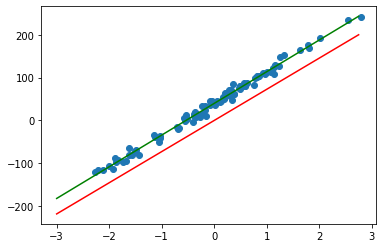

In [17]:
lr_a = LinearRegression(fit_intercept=False)
lr_a.fit(df['X'].values.reshape(-1, 1),df['Y'])

lr_b = LinearRegression(fit_intercept=True)
lr_b.fit(df['X'].values.reshape(-1, 1),df['Y'])

f = lambda x: lr_a.coef_[0] * x + lr_a.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='red')

f = lambda x: lr_b.coef_[0] * x + lr_b.intercept_
steps = list(np.arange(-3,3,.25))
pyplot.plot(steps, list(map(f, steps)),color='green')

pyplot.scatter(x=df.X,y=df.Y)

## BOSTON dataset

In [18]:
data = datasets.load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [19]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [20]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [21]:
housing_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target'])

In [22]:
housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [23]:
housing_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


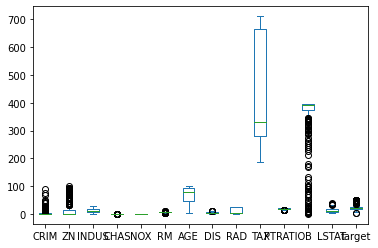

In [24]:
housing_df.plot.box()

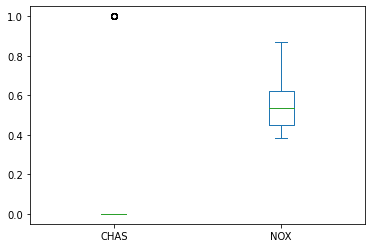

In [25]:
housing_df[['CHAS','NOX']].plot.box()

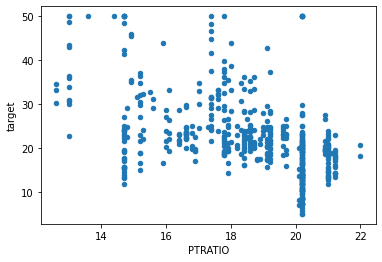

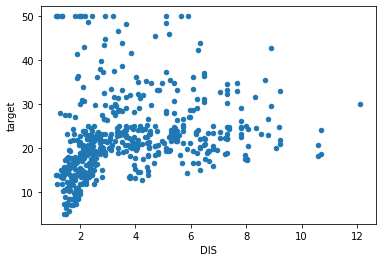

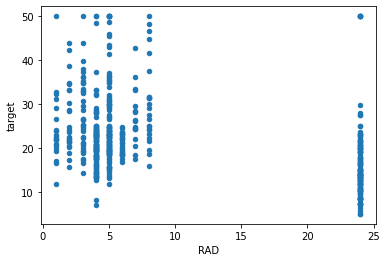

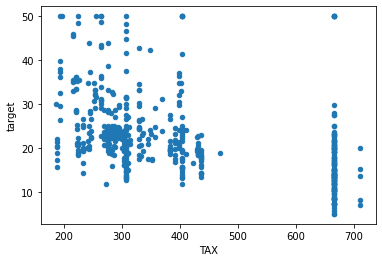

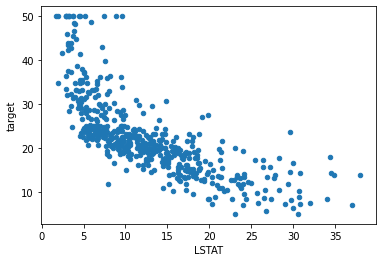

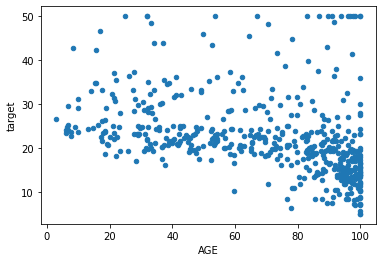

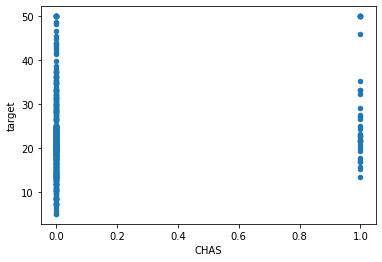

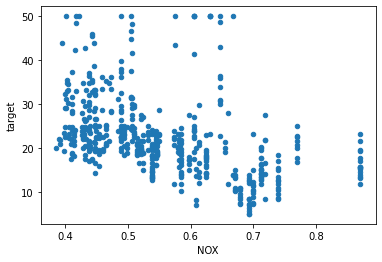

In [26]:
housing_df.plot.scatter(x='PTRATIO',y='target')   #pupil-teacher ratio by town
housing_df.plot.scatter(x='DIS',y='target')  #weighted distances to five Boston employment centres
housing_df.plot.scatter(x='RAD',y='target')  #index of accessibility to radial highways
housing_df.plot.scatter(x='TAX',y='target')  #full-value property-tax rate per $10,000
housing_df.plot.scatter(x='LSTAT',y='target')  #% lower status of the population
housing_df.plot.scatter(x='AGE',y='target')   #proportion of owner-occupied units built prior to 1940
housing_df.plot.scatter(x='CHAS',y='target')  #Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
housing_df.plot.scatter(x='NOX',y='target')  #nitric oxides concentration (parts per 10 million)

In [27]:
lr = LinearRegression()
X=housing_df[['CRIM',	'ZN',	'INDUS', 'CHAS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT']]
y=housing_df['target']

In [28]:
lr.fit(X,y)
#help(lr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LinearRegression()

In [29]:
print(lr.predict([X.iloc[501]])*1000)   #iloc is the index
#print((np.dot(lr.coef_,X.iloc[501])+lr.intercept_)*1000)
print(y.iloc[501]*1000)

[23533.34054667]
22400.0


In [30]:
print(lr.score(X,y))
help(lr.score)

0.7406426641094095
Help on method score in module sklearn.base:

score(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_sam

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [31]:
print(lr.coef_)
print(lr.intercept_)

[-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
36.459488385090125


# Homework #1   Due date: 22 Sept 2022, 11:59 PM

## Q1) One feature regression for Boston data. 
Choose one of the features in Boston data, try to select one that is mostly correlated (or inversely correlated) with the target. Fit a line with linear regression (you can use built-in LinearRegression() method). What is the equation of the fitting line? Please plot your data points (chosen feature vs. target) and plot your fitting line on it.

## Q2) Another metric for performance evaluation
We have seen that LinearRegression() by *sklearn* provides a method called *score* which outputs a value with a maximum of 1 (the larger the better), which is good to evaluate the performance. 
Another common performance metric is mean sum of squared error (MSE):

$$\frac{1}{m} \sum_{i=1}^m \left(\underbrace{\theta^T x^{(i)}}_{\text{Prediction}} - \underbrace{y^{(i)}}_{\text{Target}}\right)^2$$

Please implement this metric and compute it when Boston data with all features are used. lr.score gave 0.74. What is the MSE?

Important restriction: Do NOT use *mean_squared_error* module from *sklearn.metrics*.

## Q3) Splitting the dataset
In the lecture we did training and evaluation (score) on the same dataset. This is bad. Use the code in the iris example (Week 1 Python Notebook) to:
- shuffle the data,
- select 60% of the data as a training set (do the line fitting), 40% as a test set,
- what is the score on the test data?
- what is the mean squared error?


In [32]:
#Q1) One feature regression for Boston data.

housing_df.head()  #taking the 5 top 5 rows to check the data.


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


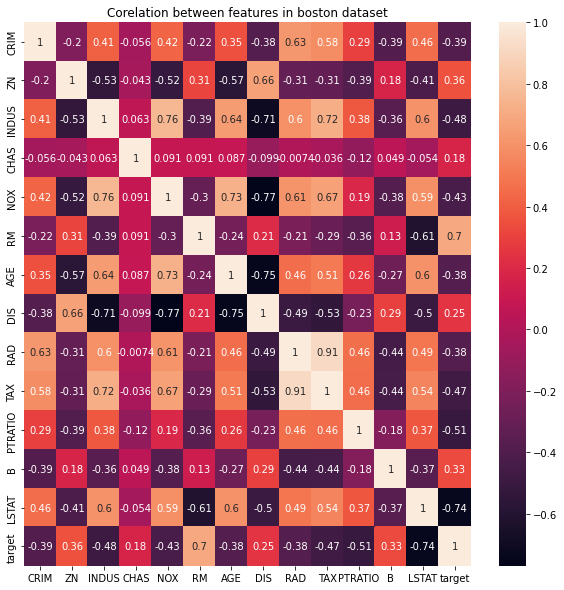

In [33]:
housing_df_corr = housing_df.corr() # dataframe.corr() is a function to find the corelation between the numerical values. It returns a data frame with corelated values to check the corelations among the feature.
fig, ax = plt.subplots(figsize=(10,10))  #  subplots are function where we can adjust the figure size
sns.heatmap(housing_df_corr, annot=True , ax=ax) # heat map is the best way to represent corelation values.
plt.title("Corelation between features in boston dataset")
plt.show()


We can observe that LSTAT( % lower status of the population) is 74% inversely proportional (-0.74) to target (house prices). This means that with increase in the % of lower status the value of house prices is getting decreased.

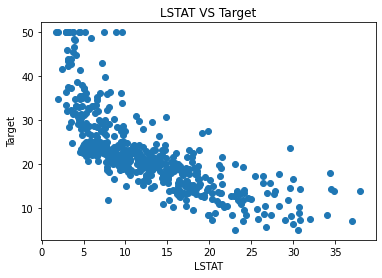

In [34]:
plt.scatter(housing_df['LSTAT'],housing_df['target'])
plt.xlabel('LSTAT')
plt.ylabel('Target')
plt.title("LSTAT VS Target")
plt.show()

This is the graphical representation of negative corelation between LSTAT and Target.

In [35]:
X= housing_df['LSTAT']
y= housing_df['target']

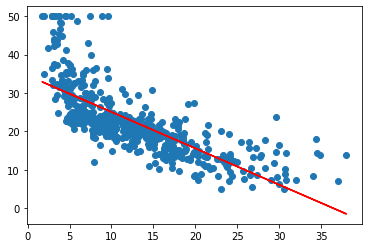

In [36]:
lr = LinearRegression()  #calling linear regression function
lr.fit(X.values.reshape(-1, 1),y) #fitting the values of X and y into the liner regression function
f = lambda x: lr.coef_[0] * x + lr.intercept_ #wrote a lambda function to insert x value to find the line h(0) = 0o + 01*x
plt.plot(X, list(map(f, X)),color='red') # drawing a regression line to check how many data points are away from the line.
plt.scatter(x=X,y=y) # plotting data points in the graph
plt.show()

MSE

Mean squared error is explain how much far the average data points are. The square in MSE nullifies the negative impact on the dataset. MSE is generally used from optimization of the regression line.**bold text**

In [37]:
lr.score(X.values.reshape(-1, 1),y)  #lr.score gives the score for coeffiecient of ditermination (R^2)

0.5441462975864797

In [38]:
target=lambda y: y
predict = lambda  x: lr.coef_[0] * x + lr.intercept_

In [39]:
target_values = list(map(target,y))
predict_values = list(map(predict,X))

In [41]:
#q2)Another metric for performance evaluation
SE = [(target_values[value] - predict_values[value])**2 for value in range(0,len(target_values))]
MSE= sum(SE)/len(target_values)
print("Mean Squared Error:", round(MSE ,2) )

Mean Squared Error: 38.48


In [42]:
#Q3) Splitting the dataset


In [53]:
from sklearn.model_selection import train_test_split  #train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42,test_size=0.40,shuffle=True)

In [55]:
lr_split= LinearRegression()
lr_split.fit(X_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [68]:
print("Train Score:",lr_split.score(X_train.values.reshape(-1, 1), y_train))  #train score

Train Score: 0.5644553678715374


In [64]:
target_train_values = list(map(target,y_train))
predict_train_values = list(map(predict,X_train))
Train_SE = [(target_train_values[value] - predict_train_values[value])**2 for value in range(0,len(target_train_values))]
Train_MSE= sum(Train_SE)/len(target_train_values)
print("Train Mean Squared Error:", round(Train_MSE ,2) ) #train MSE

Train Mean Squared Error: 39.12


**Model** **Evaluation**

**Test Score**

In [67]:
print("Test Score:",lr_split.score(X_test.values.reshape(-1, 1), y_test))

Test Score: 0.4924082641190437


**Test Mean Squared Error**

In [63]:
target_test_values = list(map(target,y_test))
predict_test_values = list(map(predict,X_test))
Test_SE = [(target_test_values[value] - predict_test_values[value])**2 for value in range(0,len(target_test_values))]
Test_MSE= sum(Test_SE)/len(target_test_values)
print("Test Mean Squared Error:", round(Test_MSE ,2))

Test Mean Squared Error: 37.53
